# Autore: Federico Marra
# Matricola: 7025997
# Mail: [federico.marra@edu.unifi.it](mailto:federico.marra@edu.unifi.it)
# [Link al GitHub](https://github.com/federicomarra/asd-lab)

## Esercizio 2 Laboratorio di Algoritmi

#### Notebook per confronto tra gli algoritmi di ordinamento Insertion-Sort e Quick-Sort
Per fare questo dovremo scrivere un notebook Jupyter che permetta di confrontare i due algoritmi verificando vantaggi e svantaggi degli algoritmi:
1. vengono generati i dati di test (esecuzioni diverse devono generare dati diversi)
2. vengono eseguiti i test e generati i risultati
3. la documentazione del codice e la descrizione degli esperimenti devono essere in Markdown all’interno del notebook stesso

## Indice
1. [Introduzione](#Introduzione)
2. [Algoritmi di ordinamento](#Algoritmi-di-ordinamento)
   - [Insertion sort](#Insertion-sort)
       1. [Complessità](#Complessità)
       2. [Correttezza](#Correttezza)
       3. [Stabilità](#Stabilità)
   - [Quick sort](#Quick-sort)
       1. [Complessità](#Complessità-i)
       2. [Correttezza](#Correttezza-i)
       3. [Stabilità](#Stabilità-i)
3. [Test](#Test)
    - [Librerie utilizzate](#Librerie-utilizzate)
    - [Funzioni per il testing](#Funzioni-per-il-testing)
    - [Esecuzione dei test](#Esecuzione-dei-test)
4. [Generazione delle tabelle dei tempi di esecuzione](#Generazione-delle-tabelle-dei-tempi-di-esecuzione)
5. [Generazione dei grafici](#Generazione-dei-grafici)
6. [Osservazioni finali](#Osservazioni-finali)
   - [Caso peggiore: valori ordinati inversamente](#Caso-peggiore:-valori-ordinati-inversamente)
   - [Caso medio: valori casuali](#Caso-medio:-valori-casuali)
   - [Caso migliore: valori già ordinati correttamente](#Caso-migliore:-valori-già-ordinati-correttamente)
7. [Ulteriori osservazioni e conclusioni](#Ulteriori-osservazioni-e-conclusioni)
8. [Bibliografia](#Bibliografia)

# Introduzione
Questo notebook è stato creato per confrontare le prestazioni degli algoritmi di ordinamento Insertion sort e Quick sort.
L'obiettivo principale è la comprensione delle differenze di prestazione tra i due algoritmi, in particolare in base alla dimensione dell'array su cui vengono eseguiti e dal tipo di array, ovvero se rappresenta il caso peggiore, medio o migliore.

# Algoritmi di ordinamento

# Insertion sort

![](https://upload.wikimedia.org/wikipedia/commons/2/24/Sorting_insertion_sort_anim.gif)

In [1]:
def insertion_sort(array): #iterativo
    # iterazione dal secondo elemento fino all'ultimo
    for j in range(1, len(array)):
        # elemento da inserire nella posizione giusta
        key = array[j]
        # indice dell'elemento precedente a key
        i = j - 1
        # cicla finché non si raggiunge la posizione corretta
        while i >= 0 and array[i] > key:
            # sposta l'elemento di una posizione a destra
            array[i + 1] = array[i]
            # decrementa l'indice per controllare l'elemento precedente
            i = i - 1
        # inserisce l'elemento nella posizione corretta
        array[i + 1] = key
    return array

# Complessità
La complessità dell'algoritmo di quick sort è
- $O(n^2)$ nel caso peggiore
- $O(n^2)$ nel caso medio
- $O(n)$ nel caso migliore

dove $n$ è la dimensione dell'array su cui viene eseguito.
# Correttezza
L'algoritmo di Insertion-Sort è corretto in quanto:
- **Inizializzazione**: all'inizio della prima iterazione del ciclo for, $j=2$ il sottoarray $A[1..j-1]$ è ordinato poiché contiene un solo elemento ($A[j]$).
- **Conservazione**: ogni iterazione del ciclo for esterno e ciclo while interno mantengono l'invariante di ciclo.
Il ciclo for esterno incrementa $j$ di 1, quindi $A[1..j-1]$ è ordinato e contiene gli stessi elementi che originariamente erano in $A[1...j-1]$.
Se $A[1...j-1]$ è ordinato e contiene gli stessi elementi che originariamente erano in $A[1..j-1]$, allora il ciclo while trova la posizione corretta per $A[j]$ e inserisce il valore in quella posizione visto che tutti i valori alla sua sinistra saranno <$A[j]$.
- **Conclusione**: quando il ciclo for termina, $j = n + 1$. Per l'invariante di ciclo, questo implica che $A[1...n]$ è ordinato e contiene gli stessi elementi di $A[1..n]$, ovvero l'array è ordinato correttamente.

L'algoritmo è corretto in quanto l'inizializzazione, il conservazione e la conclusione sono verificate.

# Stabilità
L'algoritmo di Insertion-Sort è stabile in quanto gli elementi uguali non vengono scambiati di posizione.

### Altre proprietà
- **In-Place**: l'algoritmo è in-place in quanto non necessita di memoria aggiuntiva per l'esecuzione.
- **Adattività**: l'algoritmo è adattivo in quanto se l'array è già ordinato correttamente, l'algoritmo ha complessità $O(n)$.

# Quick sort
Quick sort è un algoritmo di ordinamento basato sul paradigma del divide et impera, che consiste nel:
- **Divide:** partiziona l'array $A[p...r]$ in due sottoarray $A[p...q-1]$ e $A[q+1...r]$, in modo che tutti gli elementi del primo array siano ≤$A[q]$ e tutti quelli del secondo siano >$A[q]$. Il calcolo del valore di $q$ viene eseguito all'interno di ```partition```
- **Impera:** ordina i due sottoarray $A[p...q-1]$ e $A[q+1...r]$ chiamando ricorsivamente ```quick_sort```
- **Combina:** non è necessario fare nulla, poiché gli array sono ordinati in-place e l'intero array $A[p...r]$ è ordinato correttamente al termine della ricorsione.
![](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)

In [2]:
def quick_sort(array, p, r): #ricorsivo
    # controlla che p indice sinistro sia minore di r indice destro
    if p < r:
        # calcola il valore di q
        q = partition(array, p, r)
        # ordina i due sottoarray
        quick_sort(array, p, q - 1)
        quick_sort(array, q + 1, r)
    return array

def partition(array, p, r):
    # elemento pivot
    x = array[r]
    # indice per il sottoarray con elementi <= x
    i = p - 1
    # scorre l'array (sottoarray dell'array iniziale)
    for j in range(p, r):
        # se l'elemento è <= x
        if array[j] <= x:
            # incrementa l'indice
            i = i + 1
            # scambia gli elementi facendoli diventare <= x
            array[i], array[j] = array[j], array[i]
    # posiziona l'elemento pivot nella posizione corretta
    array[i + 1], array[r] = array[r], array[i + 1]
    return i + 1

# Complessità
La complessità dell'algoritmo di quick sort è
- $O(n^2)$ nel caso peggiore
- $O(n \log n)$ nel caso medio
- $O(n \log n)$ nel caso migliore

dove $n$ è la dimensione dell'array su cui viene eseguito.

# Correttezza
L'algoritmo di Quick sort è corretto in quanto avendo al suo interno la funzione ```partition```, questa ha al suo interno un ciclo for che rispetta le condizioni di correttezza dell'invariante di ciclo:
1. $A[k]≤x$ se $p≤k≤i$
2. $A[k]>x$ se $i+1≤k≤j-1$
3. $A[k]=x$ se $k=r$
    
- **Inizializzazione**: all'inizio della prima iterazione di ```partition```, $i=p-1$ e $j=p$. Non ci sono valori fra $p$ e $i$, quindi $A[k]≤x$ con $p≤k≤i$ è vera. Non ci sono valori neanche fra $i+1$ e $j-1$, quindi $A[k]>x$ con $i+1≤k≤j-1$ è vera. E infine vista la prima assegnazione nel partition ```x = A[r]```, dunque $x=A[r]$ con $k=r$ è vera. Quindi tutte le condizioni dell'invariante di ciclo sono rispettate.
 
- **Conservazione**: ogni iterazione del ciclo for mantiene l'invariante di ciclo. Se alla j-esima iterazione $A[j]≤x$, viene incrementato $i$ di 1 e fatto uno swap tra $A[i]$ e $A[j]$. Se invece $A[j]>x$ si scorre solamente all'iterazione successiva incrementando $j$. Se $A[p...j-1]$ è ordinato e contiene gli stessi elementi di $A[p...j-1]$, allora il ciclo for trova la posizione corretta per $A[j]$ e inserisce il valore in quella posizione ($A[i]$).

- **Conclusione**: quando il ciclo for termina, $j = r$. Per l'invariante di ciclo, questo implica che $A[p...r]$ è ordinato e contiene tre sottoarray: quelli con elementi ordinati $≤x$, un sottoarray con un solo elemento che contiene $x$ e il sottoarray con gli elementi ordinati  $>x$. Dunque l'array intero è ordinato correttamente.

L'algoritmo è dunque corretto in quanto l'inizializzazione, la conservazione e la conclusione sono verificate.

# Stabilità
L'algoritmo è stabile in quanto gli elementi uguali non vengono scambiati di posizione.

### Altre proprietà
- **In-Place**: l'algoritmo è in-place dunque ordina sul posto poiché non necessita di array aggiuntivi a cui appoggiarsi durante l'esecuzione.
- **Adattività**: l'algoritmo non è adattivo in quanto non è possibile sfruttare il fatto che l'array sia già ordinato correttamente.

# Test
Per testare i due algoritmi di ordinamento, verranno utilizzati tre tipi di array:
- con valori random per il caso medio
- già ordinato in modo crescente per il caso migliore
- già ordinato ma in modo descrescente per il caso per il caso peggiore.

Per ogni tipo di array creeremo ```nTests``` array con ognuno che avrà ```nTests``` elementi a partire da ```step```, fino a ```step```*```nTests```
Per limiti del computer, imposteremo come dimensione massima dell'array dell'ultimo test $step*nTests=2500$.
Minore sarà ```nTests``` meno tempo occorrerà per eseguire i test.

In [3]:
#step, nTests = 500, 5
#step, nTests = 250, 10
#step, nTests = 200, 14
#step, nTests = 125, 20

#step, nTests = 100, 25

step, nTests = 50, 50
#step, nTests = 25, 100
#step, nTests = 10, 250

# Librerie utilizzate
Necessito di diverse librerie per il testing, e la visualizzazione di tabelle e grafici

Libreria ```random``` per la randomizzazione dei valori degli array:

In [4]:
from random import randint as rand

Libreria ```copy``` per fare una deepcopy degli array:

In [5]:
from copy import deepcopy

Libreria ```timeit``` per la misurazione dei tempi di esecuzione in millisecondi:

In [6]:
from timeit import default_timer as timer

Libreria ```numpy``` per la creazione delle tabelle:

In [7]:
import numpy as np

Libreria ```matplotlib.pyplot``` per la creazione dei grafici:

In [8]:
import matplotlib.pyplot as plt

Libreria ```matplotlib.patches``` per aggiungere delle legende ai grafici:

In [9]:
#import matplotlib.patches as mpatch
from matplotlib import patches as mpatch

# Funzioni per il testing:

Funzione per caso peggiore: creazione array già ordinato in modo decrescente

In [10]:
def reversedArray(n):
    return list(range(n, 0, -1))

Funzione per caso medio: creazione array random

In [11]:
def randomArray(n):
    return [rand(1, n) for _ in range(n)]

Funzione per caso migliore: creazione array già ordinato in modo crescente

In [12]:
def sortedArray(n):
    return list(range(1, n + 1, 1))

Funzione che testa per tutta la lista di array contenuti Insertion sort e Quick sort

In [13]:
def test(array):
    timesInsertion = []
    timesQuick = []

    for d in range(len(array)):
        print(f"\nTest {d + 1}: dimensione = {len(array[d])}")

        arrayInsertion = deepcopy(array[d])
        arrayQuick = deepcopy(array[d])

        start = timer()
        insertion_sort(arrayInsertion)
        end = timer()
        timesInsertion.append((end - start) * 1000)
        print(f"Insertion sort: {timesInsertion[d]} ms")

        start = timer()
        quick_sort(arrayQuick, 0, len(arrayQuick) - 1)
        end = timer()
        timesQuick.append((end - start) * 1000)
        print(f"Quick sort: {timesQuick[d]} ms")

    return timesInsertion, timesQuick

# Esecuzione dei test

Generazione array caso medio, migliore e peggiore

In [14]:
WorstArrays = []
AverageArrays = []
BestArrays = []
for i in range(step, step * (nTests + 1), step):
    WorstArrays.append(reversedArray(i))
    AverageArrays.append(randomArray(i))
    BestArrays.append(sortedArray(i))

### Esecuzione test caso peggiore

In [15]:
WorstTimesInsertion, WorstTimesQuick = test(WorstArrays)


Test 1: dimensione = 50
Insertion sort: 0.27536800000049766 ms
Quick sort: 0.32679300000015843 ms

Test 2: dimensione = 100
Insertion sort: 1.1014549999996959 ms
Quick sort: 5.591861000000087 ms

Test 3: dimensione = 150
Insertion sort: 2.4828030000003665 ms
Quick sort: 2.195666000000429 ms

Test 4: dimensione = 200
Insertion sort: 5.317296999999499 ms
Quick sort: 4.4304860000004 ms

Test 5: dimensione = 250
Insertion sort: 10.104349000000568 ms
Quick sort: 6.75866399999947 ms

Test 6: dimensione = 300
Insertion sort: 10.228446000000169 ms
Quick sort: 8.729388999999976 ms

Test 7: dimensione = 350
Insertion sort: 15.421523999999742 ms
Quick sort: 14.362091999999826 ms

Test 8: dimensione = 400
Insertion sort: 19.909177999999805 ms
Quick sort: 16.874613999999788 ms

Test 9: dimensione = 450
Insertion sort: 23.846469000000425 ms
Quick sort: 17.756899000000104 ms

Test 10: dimensione = 500
Insertion sort: 30.371401999999215 ms
Quick sort: 44.66245900000043 ms

Test 11: dimensione = 550
I

### Esecuzione test caso medio

In [16]:
AverageTimesInsertion, AverageTimesQuick = test(AverageArrays)


Test 1: dimensione = 50
Insertion sort: 0.14515599999853634 ms
Quick sort: 0.07894200000180263 ms

Test 2: dimensione = 100
Insertion sort: 0.5391810000006103 ms
Quick sort: 0.17776500000010742 ms

Test 3: dimensione = 150
Insertion sort: 1.1756739999988497 ms
Quick sort: 0.2706080000010047 ms

Test 4: dimensione = 200
Insertion sort: 3.983139999998997 ms
Quick sort: 0.5957770000009077 ms

Test 5: dimensione = 250
Insertion sort: 3.980839000000458 ms
Quick sort: 0.5536979999973823 ms

Test 6: dimensione = 300
Insertion sort: 7.619818999998529 ms
Quick sort: 0.7087309999995739 ms

Test 7: dimensione = 350
Insertion sort: 7.162726000000674 ms
Quick sort: 1.282606000000186 ms

Test 8: dimensione = 400
Insertion sort: 10.309124999999142 ms
Quick sort: 0.9786749999989297 ms

Test 9: dimensione = 450
Insertion sort: 19.182156000002948 ms
Quick sort: 2.0857790000015086 ms

Test 10: dimensione = 500
Insertion sort: 16.850071000000355 ms
Quick sort: 1.2186129999989248 ms

Test 11: dimensione =

### Esecuzione test caso migliore

In [17]:
BestTimesInsertion, BestTimesQuick = test(BestArrays)


Test 1: dimensione = 50
Insertion sort: 0.014684999996461556 ms
Quick sort: 0.32944699999859495 ms

Test 2: dimensione = 100
Insertion sort: 0.02386999999970385 ms
Quick sort: 1.248465999999837 ms

Test 3: dimensione = 150
Insertion sort: 0.03700599999945098 ms
Quick sort: 2.66327300000313 ms

Test 4: dimensione = 200
Insertion sort: 0.04760899999922685 ms
Quick sort: 5.5901560000037875 ms

Test 5: dimensione = 250
Insertion sort: 0.07322599999781687 ms
Quick sort: 11.169772000002354 ms

Test 6: dimensione = 300
Insertion sort: 0.07230100000299444 ms
Quick sort: 13.741738000000225 ms

Test 7: dimensione = 350
Insertion sort: 0.08875200000346695 ms
Quick sort: 18.440898999998012 ms

Test 8: dimensione = 400
Insertion sort: 0.11366499999354573 ms
Quick sort: 29.804517000002306 ms

Test 9: dimensione = 450
Insertion sort: 0.23140799999765704 ms
Quick sort: 33.020963000005565 ms

Test 10: dimensione = 500
Insertion sort: 0.14209199999726252 ms
Quick sort: 37.548912999994855 ms

Test 11: d

# Generazione delle tabelle dei tempi di esecuzione
Definisco una funzione che rende in input una lista di colonne di dati, delle intestazioni e un titolo e che stampa una tabella con i dati presi in input

In [18]:
def drawTable(data, title, colorHead="orange", colorCell="yellow"):
    # Crea un nuovo grafico
    figSizeX = 8
    figSizeY = nTests / 3 + 1
    fig, ax = plt.subplots(figsize=(figSizeX, figSizeY))
    plt.title(title)

    # Unisci le liste di dati come colonne al fine di creare un array bidimensionale di dati: 'data'
    data = np.stack(tuple(data), axis=1)

    # Intestazioni della tabella
    headers = ("N° elementi", "Insertion sort", "Quick sort")

    # Stile tabella
    ax.axis('off')
    table = ax.table(cellText=data, colLabels=headers, loc='center', cellLoc='center')
    table.auto_set_column_width(col=list(range(len(data))))
    table.scale(1, 1.5)
    
    # Colorazione delle celle
    cell_colors = {
        cell: (colorHead, {"weight": "bold"})
        if table[cell].get_text().get_text() in headers
        else (colorCell, {})
        for cell in table._cells
        if cell[0] % 2 == 0
    }
    
    # Imposta il colore delle celle
    for cell, (color, text_props) in cell_colors.items():
        # imposta il colore della cella
        table[cell].set_facecolor(color)
        # imposta le proprietà del testo della cella
        table[cell].set_text_props(**text_props)
        
    plt.show() 

Creo colonne di dati per la creazione delle tabelle

In [19]:
# Generazione colonna tempi caso peggiore
WorstData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in WorstTimesInsertion],
    ["{:.3e}".format(val) for val in WorstTimesQuick]
]
WorstTitle = "Figura 1: Caso peggiore: tempi di esecuzione con lista ordinata inversamente [ms]"

# Generazione colonna tempi caso medio
AverageData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in AverageTimesInsertion],
    ["{:.3e}".format(val) for val in AverageTimesQuick]
]
AverageTitle = "Figura 1: Caso medio: tempi di esecuzione con valori casuali [ms]"

# Generazione colonna tempi caso migliore
BestData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in BestTimesInsertion],
    ["{:.3e}".format(val) for val in BestTimesQuick]
]
BestTitle = "Figura 3: Caso migliore: tempi di esecuzione con lista ordinata [ms]"

### Tabella caso peggiore

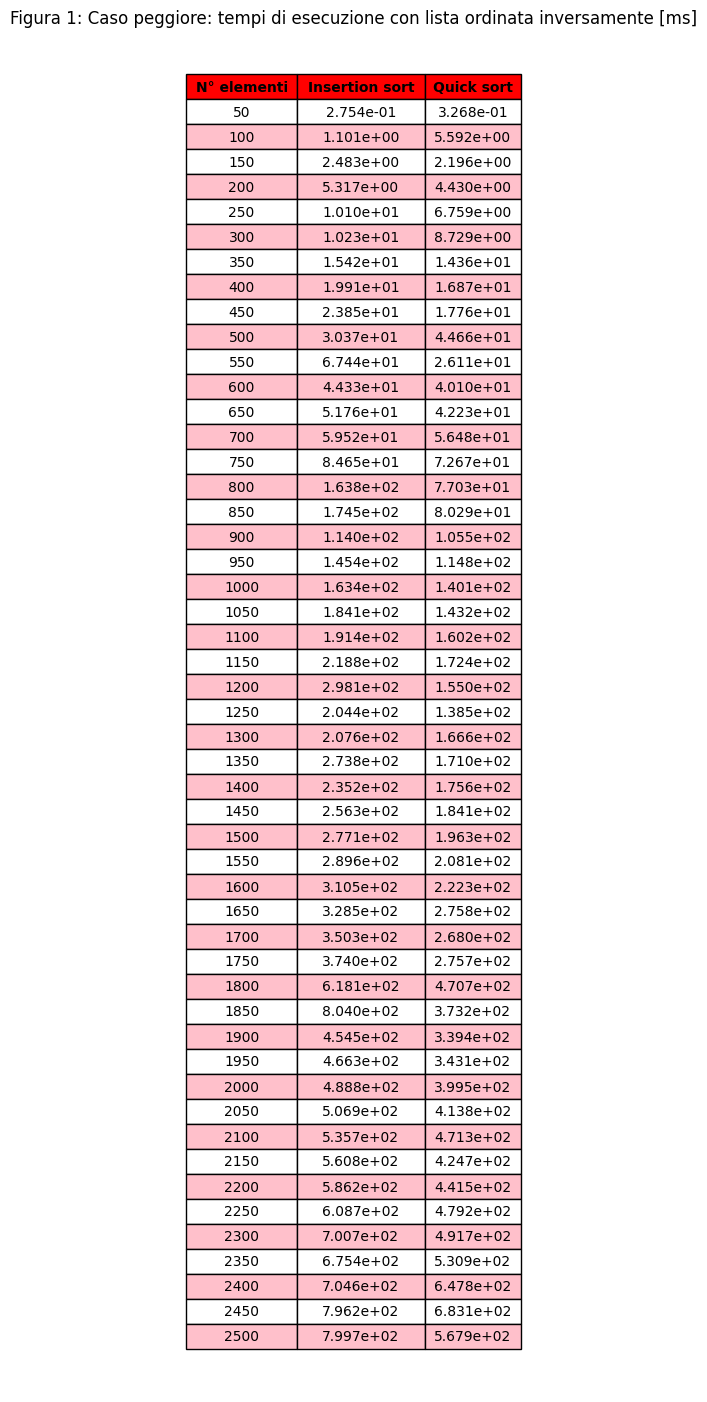

In [20]:
drawTable(WorstData, WorstTitle, "red", "pink")

### Tabella caso medio

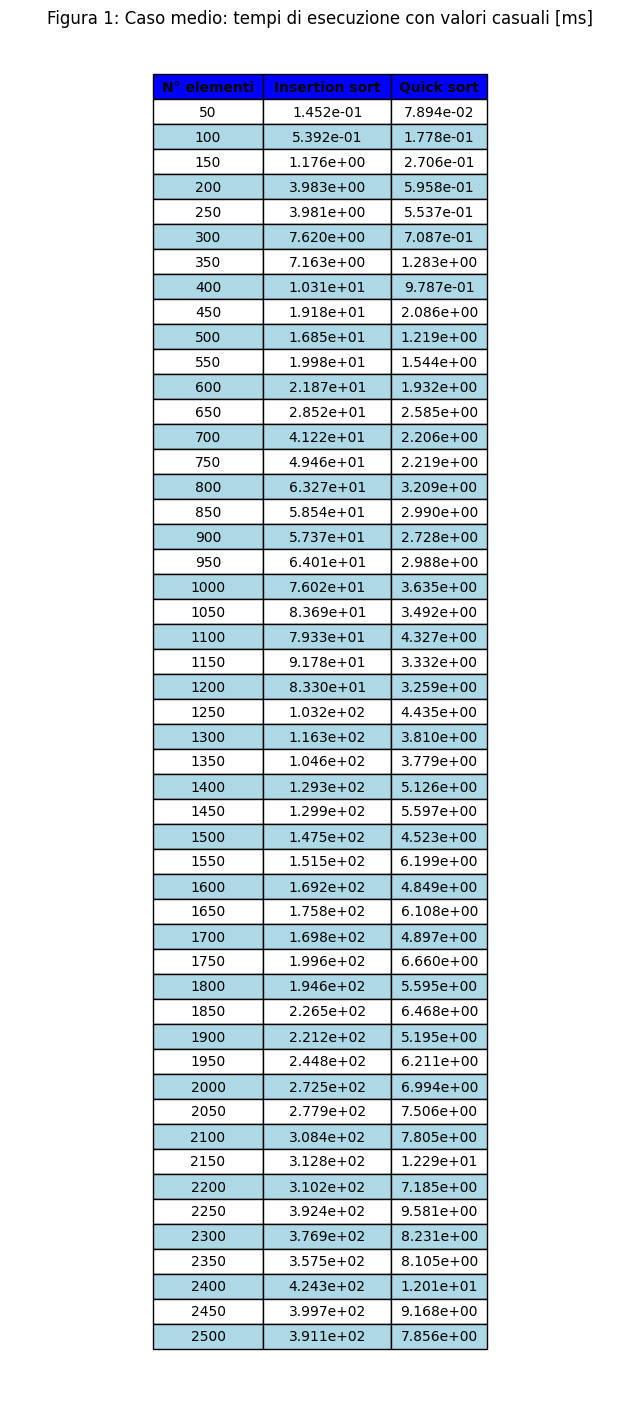

In [21]:
drawTable(AverageData, AverageTitle, "blue", "lightblue")

### Tabella caso migliore

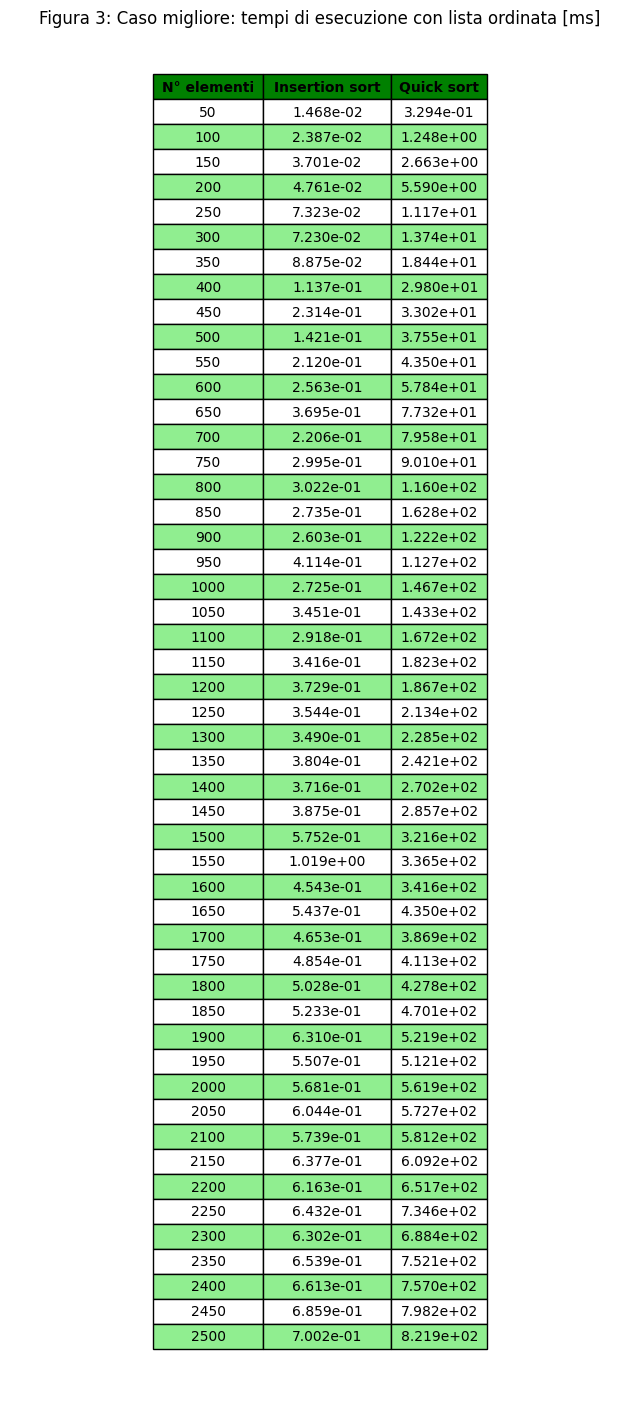

In [22]:
drawTable(BestData, BestTitle, "green", "lightgreen")

# Generazione dei grafici

Funzioni per la generazione dei grafici:
- **drawSideGraphs** disegna a sinistra i tempi di Insertion sort e a destra di Quick sort
- **drawPlotComparison** disegna nello stesso grafico con colori diversi i tempi di Insertion sort e di Quick sort

In [23]:
# Parametri per il disegno dei grafici
x_axis = [i for i in range(step, step * (nTests + 1), step)]
label1, color1 = "Insertion Sort", "darkgreen"
label2, color2 = "Quick sort", "blue"
xlabel, ylabel = "Dimensione dell'array (n)", "Tempo di esecuzione [ms]"
legend1, legend2 = mpatch.Patch(label=label1, color=color1), mpatch.Patch(label=label2, color=color2)

In [24]:
def drawSideGraphs(left_data, right_data, plot_title):
    fig, (left, right) = plt.subplots(1, 2, figsize=(15, 5))

    # Insertion sort, grafico a sinistra
    left.plot(x_axis, left_data, color=color1)
    left.set_title(label1)
    left.set_xlabel(xlabel)
    left.set_ylabel(ylabel)
    left.legend(handles=[legend1])

    # Quick sort, grafico a destra
    right.plot(x_axis, right_data, color=color2)
    right.set_title(label2)
    right.set_xlabel(xlabel)
    right.set_ylabel(ylabel)
    right.legend(handles=[legend2])

    fig.suptitle(plot_title, fontsize=16)
    plt.show()

In [25]:
def drawPlotComparison(data1, data2, title):
    graph, plot = plt.subplots(1,1, figsize=(15,12))
    plot.plot(x_axis, data1, label=label1, color=color1)
    plot.plot(x_axis, data2, label=label2, color=color2)
    plot.set_title(title)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    plot.legend(handles=[legend1, legend2])
    
    plt.show()

### Grafici caso peggiore

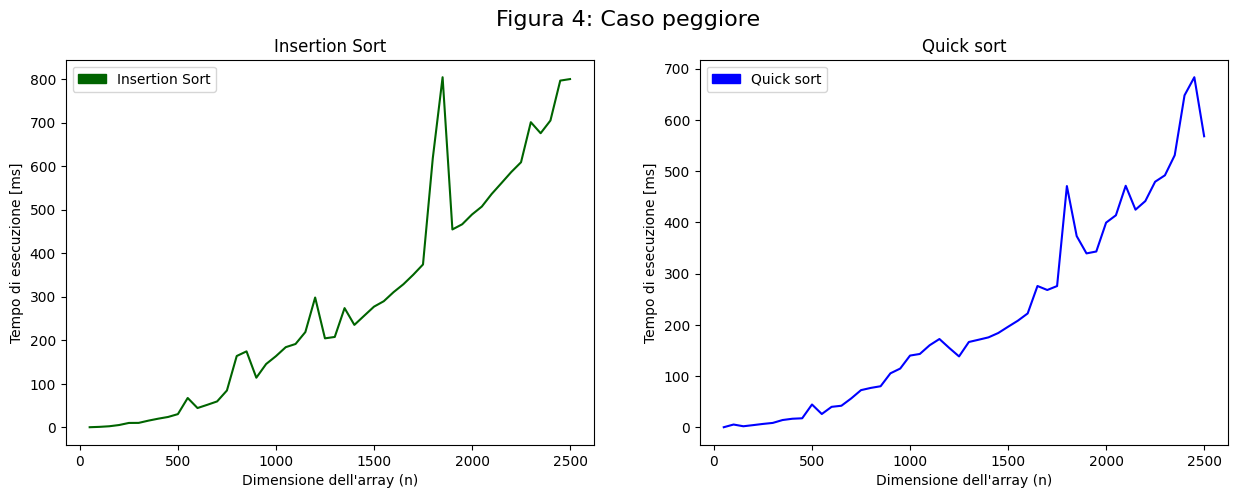

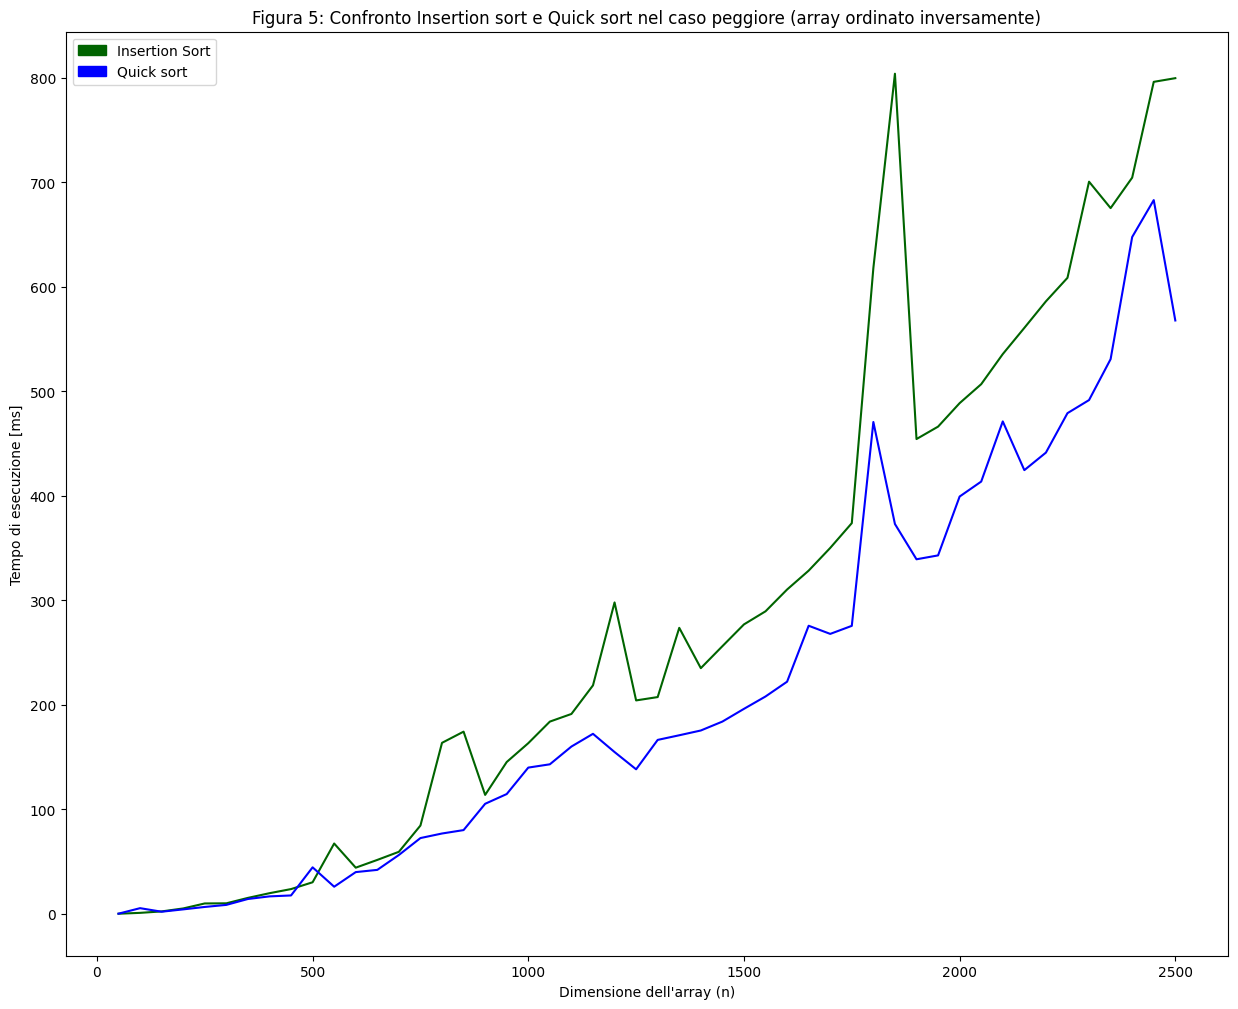

In [26]:
drawSideGraphs(WorstTimesInsertion, WorstTimesQuick, "Figura 4: Caso peggiore")
drawPlotComparison(WorstTimesInsertion, WorstTimesQuick, "Figura 5: Confronto Insertion sort e Quick sort nel caso peggiore (array ordinato inversamente)")

### Grafici caso medio

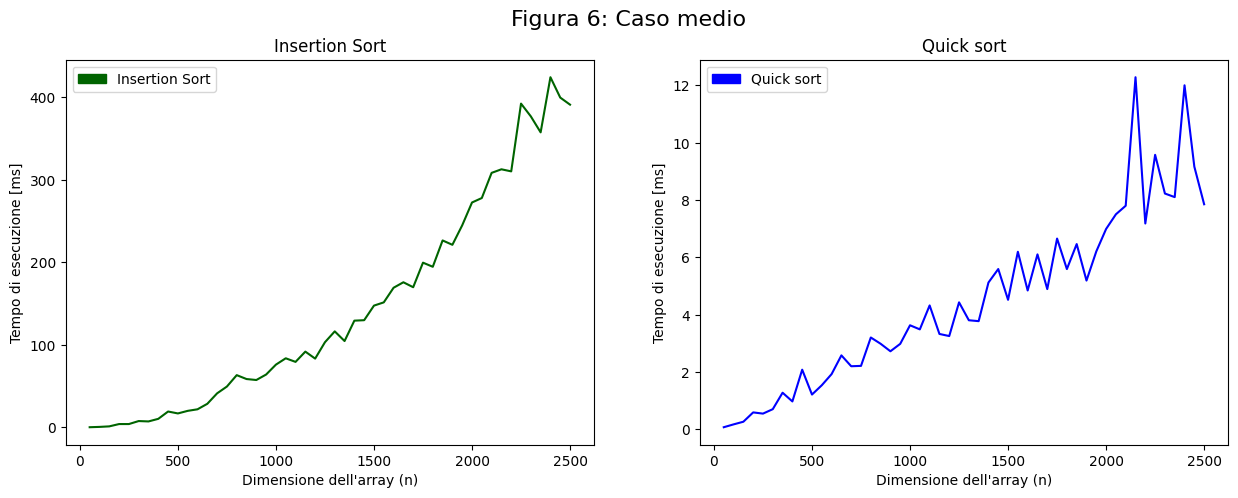

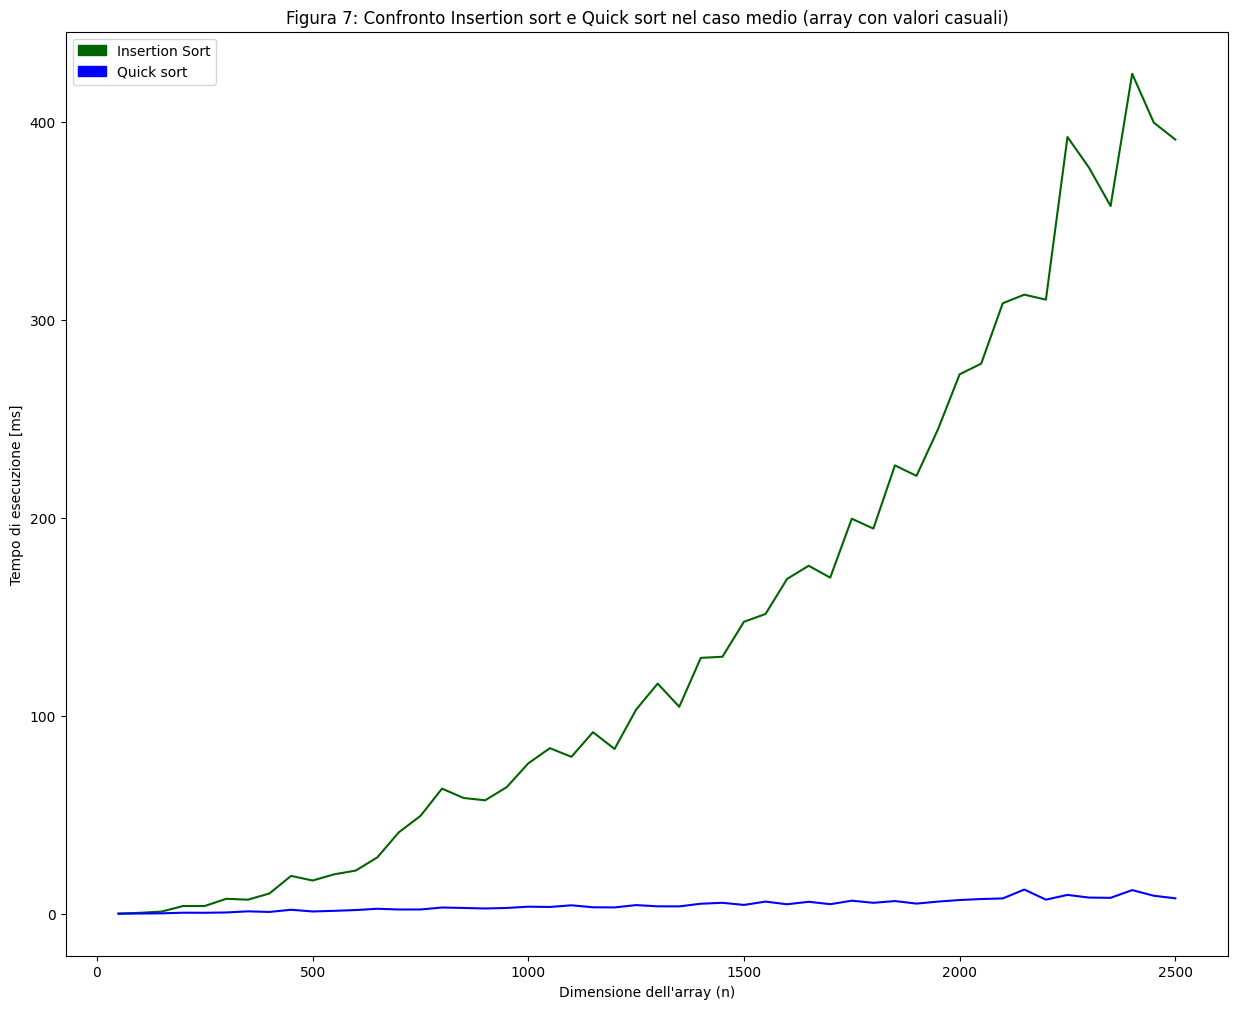

In [27]:
drawSideGraphs(AverageTimesInsertion, AverageTimesQuick, "Figura 6: Caso medio")
drawPlotComparison(AverageTimesInsertion, AverageTimesQuick, "Figura 7: Confronto Insertion sort e Quick sort nel caso medio (array con valori casuali)")

### Grafici caso migliore

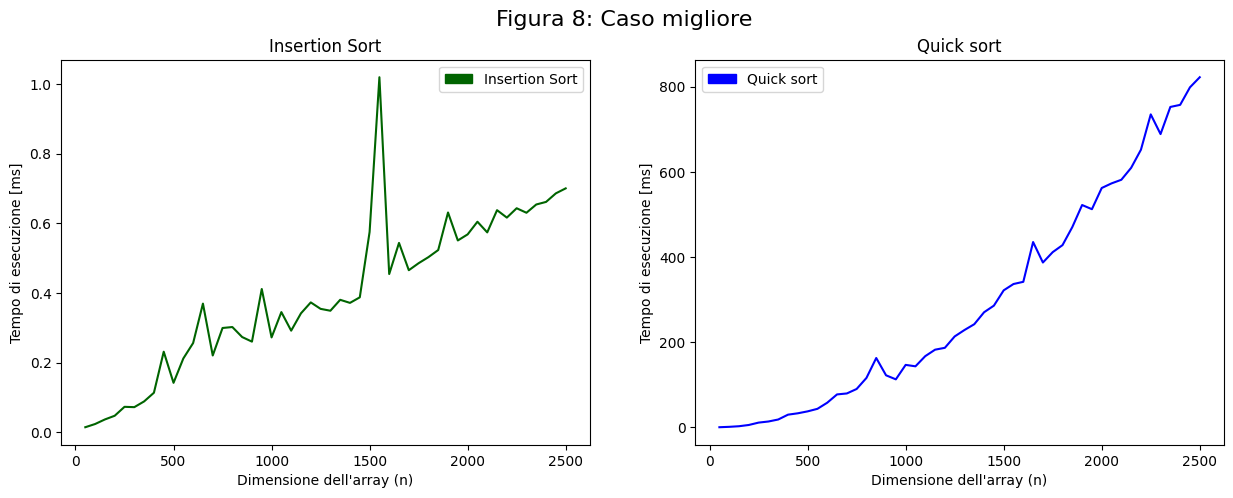

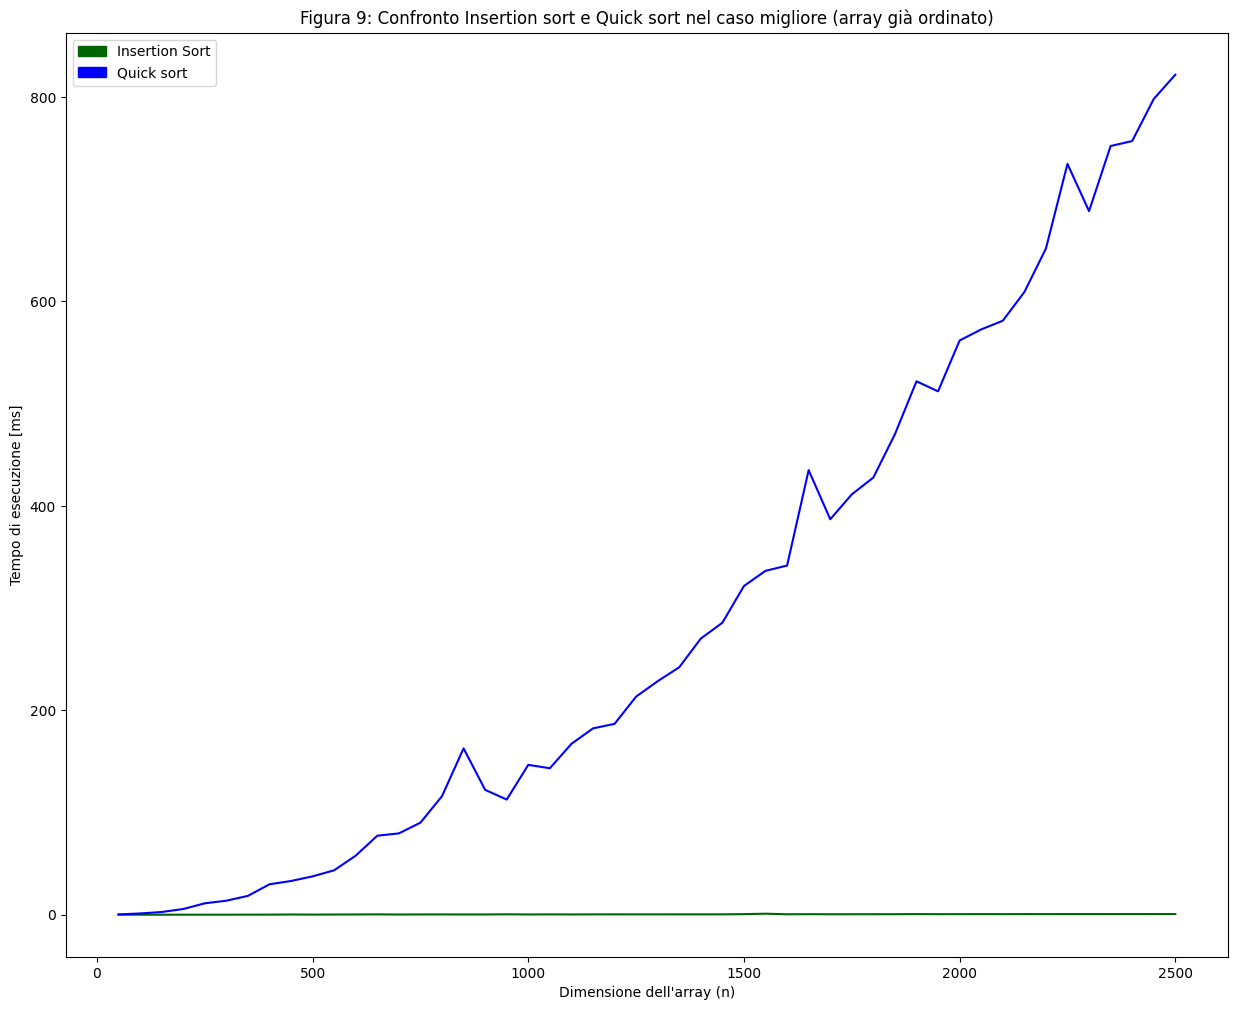

In [28]:
drawSideGraphs(BestTimesInsertion, BestTimesQuick, "Figura 8: Caso migliore")
drawPlotComparison(BestTimesInsertion, BestTimesQuick, "Figura 9: Confronto Insertion sort e Quick sort nel caso migliore (array già ordinato)")

# Osservazioni finali
Ricordiamo le complessità dei due algoritmi: <br><br>

|Algoritmo| Caso peggiore | Caso medio | Caso migliore |
|:---:|:-------------:|:----------:|:-------------:|
|**InsertionSort**|   $O(n^2)$    |  $O(n^2)$  |    $O(n)$     |
|**QuickSort** |   $O(n^2)$    | $O(n \log n)$ |  $O(n \log n)$   |

<br><br>
### Caso peggiore: valori ordinati inversamente
Come si può notare dai grafici nelle figure 4 e 5, nel caso peggiore l'algoritmo Insertion sort e Quick sort hanno tempi di esecuzione simili al crescere della dimensione dell'array (n) e hanno un andamento $≤n^2$. Dunque l'esperimento conferma ciò che ci aspettavamo, ovvero che nel caso peggiore i due algoritmi hanno complessità $O(n^2)$.

### Caso medio: valori casuali
Come si può notare dai grafici nelle figure 6 e 7, nel caso medio l'algoritmo Insertion sort ha un andamento $≤n^2$ mentre Quick sort ha un andamento $≤n \log n$. Dunque l'esperimento conferma ciò che ci aspettavamo, ovvero che nel caso medio l'algoritmo Insertion sort ha complessità $O(n^2)$ mentre Quick sort ha complessità $O(n \log n)$.

### Caso migliore: valori già ordinati correttamente
Come si può notare dai grafici nelle figure 8 e 9, nel caso migliore l'algoritmo Insertion sort ha un andamento $≤n$ mentre Quick sort ha un andamento $≤n \log n$. Dunque l'esperimento conferma ciò che ci aspettavamo, ovvero che nel caso migliore l'algoritmo Insertion sort ha complessità $O(n)$ mentre Quick sort ha complessità $O(n \log n)$.

# Ulteriori osservazioni e conclusioni
Da questo possiamo dedurre che in base alla disposizione dell'array in input ci converrà un algoritmo piuttosto che un altro.
Nel caso peggiore, con valori ordinati in modo decrescente non ci sarà una sostanziale differenza anche se sperimentalmente Insertion sort è risultato di poco più veloce di Quick sort.
Nel caso medio, con valori random invece conviene usare Quick sort.
Nel caso migliore, con valori già ordinati in modo crescente conviene usare Insertion sort.

# Bibliografia
- Introduzione agli algoritmi e alle strutture dati, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, Clifford Stein, 2009, terza edizione italiana, capitoli 2 e 7
- Slide Moodle Prof. Marinai

Per le gif animate:
- [Wikipedia insertion sort](https://it.wikipedia.org/wiki/Insertion_sort)
- [Wikipedia quick sort](https://it.wikipedia.org/wiki/Quicksort)